## Import Module

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

import seaborn as sns
import scipy.stats as scp

from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler

#EDA

##Import Data


In [ ]:
dv = pd.read_csv("09_DeteksiVirus.csv")

print("Data has size:", dv.shape)
dv.head()

Data has size: (149668, 44)


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


IdDefaultBrowser  IdSettingAntivirus  BanyakAntivirus  IdNegaraPembuat  \
0               NaN             46413.0              2.0               68   
1               NaN              5106.0              3.0               57   
2               NaN             53447.0              1.0               93   
3               NaN             53447.0              1.0               50   
4            3176.0              7945.0              2.0               68   

   IdKotaPembuat  IdOrganisasiPembuat  IdLokasiGeografisMesinSaatIni  \
0       151854.0                 27.0                          276.0   
1       117751.0                  NaN                          277.0   
2        36825.0                  NaN                          119.0   
3       115291.0                  NaN                           98.0   
4        43129.0                 27.0                          150.0   

    Platform Processor  OsSuite  ... SkuNameOS  TipeInstallasiOS  \
0  windows10       x64      768  ...      CORE            Update   
1  windows10       x64      768  ...      CORE        UUPUpgrade   
2  windows10       x64      768  ...      CORE           Refresh   
3  windows10       x86      768  ...      CORE           Upgrade   
4  windows10       x64      768  ...      CORE        UUPUpgrade   

                       AutoUpdateSetting IsOSGenuine  IdPembuatFirmware  \
0                                UNKNOWN  IS_GENUINE              554.0   
1                               FullAuto  IS_GENUINE              355.0   
2                               FullAuto  IS_GENUINE              500.0   
3                                 Notify  IS_GENUINE              781.0   
4  AutoInstallAndRebootAtMaintenanceTime  IS_GENUINE              142.0   

   IdVersiFirmware  IsSecureBootEnabled  IsTouchScreen  IsGamer  \
0          33015.0                    1              0      0.0   
1           7203.0                    1              1      1.0   
2          33157.0                    0              0      0.0   
3          63041.0                    0              0      0.0   
4          70083.0                    1              0      0.0   

   infected_proba  
0           0.626  
1           0.995  
2           0.937  
3           0.661  
4           0.995  

[5 rows x 44 columns]

## Visualisasi

In [ ]:
dv

IdDefaultBrowser  IdSettingAntivirus  BanyakAntivirus  \
0                    NaN             46413.0              2.0   
1                    NaN              5106.0              3.0   
2                    NaN             53447.0              1.0   
3                    NaN             53447.0              1.0   
4                 3176.0              7945.0              2.0   
...                  ...                 ...              ...   
149663               NaN                 NaN              NaN   
149664               NaN                 NaN              NaN   
149665               NaN                 NaN              NaN   
149666               NaN                 NaN              NaN   
149667               NaN                 NaN              NaN   

        IdNegaraPembuat  IdKotaPembuat  IdOrganisasiPembuat  \
0                    68       151854.0                 27.0   
1                    57       117751.0                  NaN   
2                    93        36825.0                  NaN   
3                    50       115291.0                  NaN   
4                    68        43129.0                 27.0   
...                 ...            ...                  ...   
149663               29        11397.0                  NaN   
149664               51        40629.0                 27.0   
149665               51        13832.0                 37.0   
149666              150       106860.0                  NaN   
149667               97        89935.0                  NaN   

        IdLokasiGeografisMesinSaatIni     Platform Processor  OsSuite  ...  \
0                               276.0    windows10       x64      768  ...   
1                               277.0    windows10       x64      768  ...   
2                               119.0    windows10       x64      768  ...   
3                                98.0    windows10       x86      768  ...   
4                               150.0    windows10       x64      768  ...   
...                               ...          ...       ...      ...  ...   
149663                           35.0  windows2016       x64      274  ...   
149664                           98.0  windows2016       x64      400  ...   
149665                          211.0  windows2016       x64       16  ...   
149666                          192.0  windows2016       x64      272  ...   
149667                          126.0  windows2016       x64      272  ...   

                           SkuNameOS  TipeInstallasiOS  \
0                               CORE            Update   
1                               CORE        UUPUpgrade   
2                               CORE           Refresh   
3                               CORE           Upgrade   
4                               CORE        UUPUpgrade   
...                              ...               ...   
149663               STANDARD_SERVER          IBSClean   
149664  DATACENTER_EVALUATION_SERVER          IBSClean   
149665               STANDARD_SERVER          IBSClean   
149666    STANDARD_EVALUATION_SERVER          IBSClean   
149667               STANDARD_SERVER          IBSClean   

                            AutoUpdateSetting      IsOSGenuine  \
0                                     UNKNOWN       IS_GENUINE   
1                                    FullAuto       IS_GENUINE   
2                                    FullAuto       IS_GENUINE   
3                                      Notify       IS_GENUINE   
4       AutoInstallAndRebootAtMaintenanceTime       IS_GENUINE   
...                                       ...              ...   
149663                         DownloadNotify  INVALID_LICENSE   
149664                         DownloadNotify       IS_GENUINE   
149665                         DownloadNotify       IS_GENUINE   
149666                         DownloadNotify       IS_GENUINE   
149667                         DownloadNotify  INVALID_LICENSE   

        IdPembuatFirmware  IdVersiFirmware 

In [ ]:
dv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149668 entries, 0 to 149667
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   IdDefaultBrowser               4613 non-null    float64
 1   IdSettingAntivirus             134400 non-null  float64
 2   BanyakAntivirus                134400 non-null  float64
 3   IdNegaraPembuat                149668 non-null  int64  
 4   IdKotaPembuat                  144598 non-null  float64
 5   IdOrganisasiPembuat            105521 non-null  float64
 6   IdLokasiGeografisMesinSaatIni  149646 non-null  float64
 7   Platform                       149668 non-null  object 
 8   Processor                      149668 non-null  object 
 9   OsSuite                        149668 non-null  int64  
 10  OsPlatformSubRelease           149668 non-null  object 
 11  VersiInternetExplorer          148834 non-null  float64
 12  SmartScreenSetting            

In [ ]:
dv.describe()

IdDefaultBrowser  IdSettingAntivirus  BanyakAntivirus  IdNegaraPembuat  \
count       4613.000000       134400.000000    134400.000000    149668.000000   
mean        1725.181661        42260.929918         1.278586       107.131311   
std         1047.313538        15016.485602         0.483934        63.682301   
min            8.000000           55.000000         1.000000         1.000000   
25%          662.000000        29199.000000         1.000000        51.000000   
50%         1727.000000        51954.000000         1.000000        97.000000   
75%         2726.000000        53447.000000         2.000000       164.000000   
max         3195.000000        70469.000000         5.000000       222.000000   

       IdKotaPembuat  IdOrganisasiPembuat  IdLokasiGeografisMesinSaatIni  \
count  144598.000000        105521.000000                  149646.000000   
mean    82358.580008            24.890780                     170.214546   
std     48814.122387             5.479461                      90.019865   
min         7.000000             1.000000                       1.000000   
25%     37428.250000            18.000000                      89.000000   
50%     83758.000000            27.000000                     181.000000   
75%    124736.000000            27.000000                     267.000000   
max    167953.000000            52.000000                     295.000000   

             OsSuite  VersiInternetExplorer          IdOEM  ...  \
count  149668.000000          148834.000000  148392.000000  ...   
mean      547.309505             240.013028    2381.251516  ...   
std       253.337654             107.729477    1382.926076  ...   
min        16.000000               2.000000      74.000000  ...   
25%       256.000000             117.000000    1443.000000  ...   
50%       768.000000             323.000000    2206.000000  ...   
75%       768.000000             333.000000    3035.000000  ...   
max       784.000000             429.000000    6143.000000  ...   

       UkuranHorisontalLayar  UkuranVertikalLayar        BuildOS  \
count          143547.000000        143547.000000  149668.000000   
mean             1491.135419           874.431789   13545.320068   
std               329.716481           180.433159    2644.374069   
min                -1.000000            -1.000000    7601.000000   
25%              1366.000000           768.000000   10586.000000   
50%              1366.000000           768.000000   14393.000000   
75%              1600.000000          1024.000000   16299.000000   
max              7680.000000          3840.000000   18237.000000   

       RevisiBuildOS  IdPembuatFirmware  IdVersiFirmware  IsSecureBootEnabled  \
count  149668.000000      145604.000000    145763.000000        149668.000000   
mean      814.413188         420.462810     32302.995945             0.384090   
std      1969.682865         231.248797     21082.281356             0.486381   
min         0.000000          13.000000         5.000000             0.000000   
25%       165.000000         142.000000     13871.000000             0.000000   
50%       321.000000         500.000000     33026.000000             0.000000   
75%       693.000000         556.000000     52402.000000             1.000000   
max     41736.000000        1087.000000     72091.000000             1.000000   

       IsTouchScreen        IsGamer  infected_proba  
count  149668.000000  148978.000000   149668.000000  
mean        0.097102       0.101726        0.487458  
std         0.296097       0.302289        0.356851  
min         0.000000       0.000000        0.005000  
25%         0.000000       0.000000        0.145000  
50%         0.000000       0.000000        0.481000  
75%         0.000000       0.000000        0.819000  
max         1.000000       1.000000        0.995000  

[8 rows x 28 columns]

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


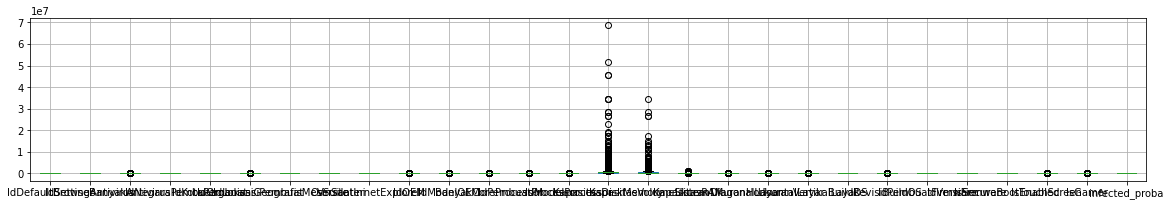

In [ ]:
#Melihat adanya outliers
dv.boxplot(figsize=(20,3))

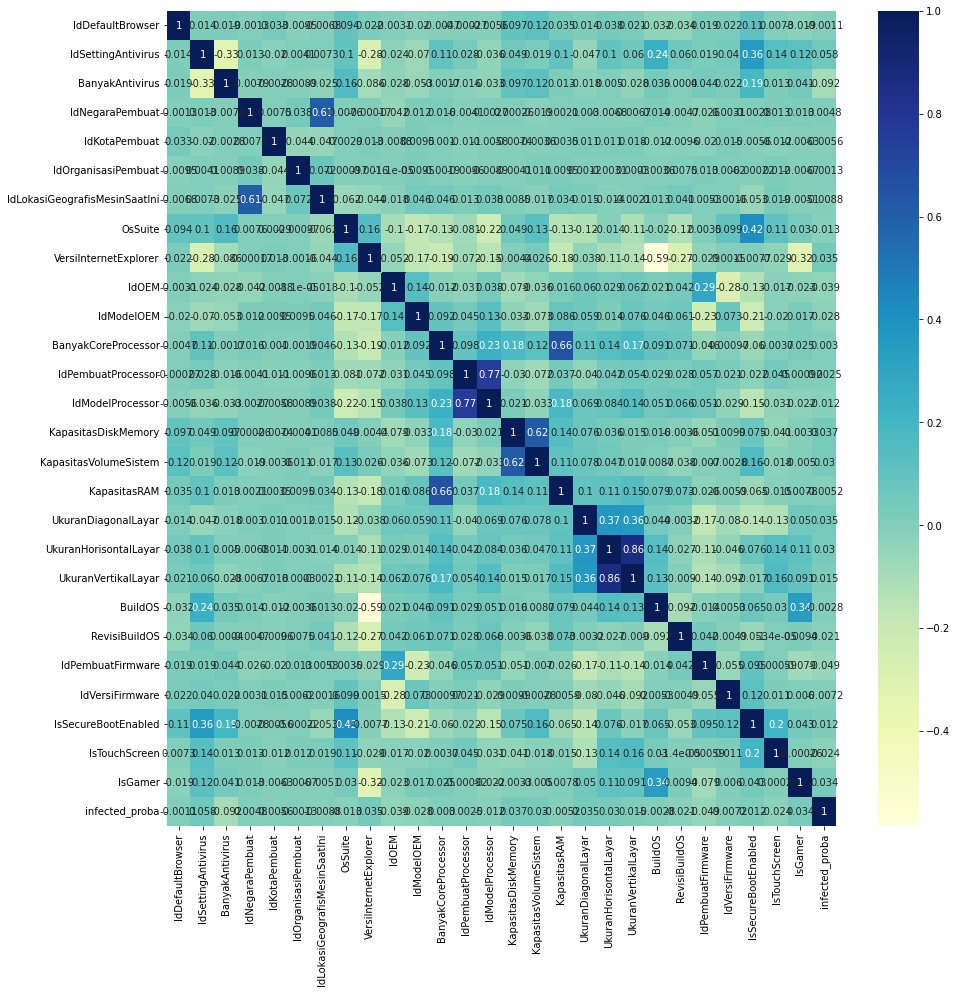

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))

sns.heatmap(dv.corr(), cmap="YlGnBu", annot=True)

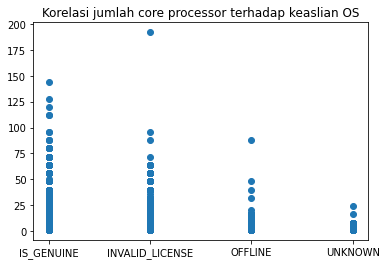

In [ ]:
plt.title('Korelasi jumlah core processor terhadap keaslian OS')
plt.scatter(dv['IsOSGenuine'], dv['BanyakCoreProcessor'])

Semakin banyak core processor, kita akan berpeluang untuk mendapakan OS yang asli

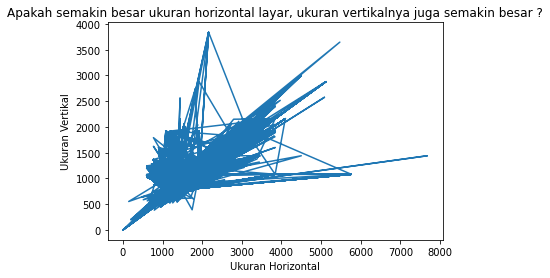

In [ ]:
plt.plot(dv['UkuranHorisontalLayar'], dv['UkuranVertikalLayar'])
plt.title('Apakah semakin besar ukuran horizontal layar, ukuran vertikalnya juga semakin besar ?')
plt.xlabel('Ukuran Horizontal')
plt.ylabel('Ukuran Vertikal')
plt.show()

Kemungkinan besar, apabila semakin besar ukuran layar horizontal maka akan semakin besar pula ukuran vertikalnya

#Pre Processing

## Duplicated Data

In [ ]:
dv_cleaned = dv.copy()

In [ ]:
dv_cleaned.duplicated(keep=False).sum()

101

In [ ]:
# dropping duplicate values
dv_cleaned = dv_cleaned.drop_duplicates()

dv_cleaned.duplicated(keep=False).sum()

0

## Outliers

In [ ]:
def outlier_counter(df):
  q1 = df.quantile(q = 0.25)
  q3 = df.quantile(q = 0.75)
  iqr = q3 - q1
  hasil = ((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).sum()
  return hasil

In [ ]:
def outlier_to_median(df, column):
  # membuat outliers menjadi NaN Value
  quartile1 = df[column].quantile(q=0.25)
  quartile3 = df[column].quantile(q=0.75)
  iqr = quartile3 - quartile1
  df.loc [df[column] < (quartile1 - 1.5 * iqr), column] = np.nan
  df.loc [df[column] > (quartile3 + 1.5 * iqr), column] = np.nan
  # mengisi bagian yang NaN aatau yang missing value dengan median
  df.fillna(df[column].median())
  # memeriksa apakah masih ada outliers atau tidak
  quartile1 = df[column].quantile(q=0.25)
  quartile3 = df[column].quantile(q=0.75)
  recent_outlier = ((df[column] < (quartile1 - 1.5 * iqr)) | (df[column] > (quartile3 + 1.5 * iqr))).sum()
  print("outlier saat ini ada sebanyak",recent_outlier)

In [ ]:
def drop_outlier(df, column):
  # membuat outliers menjadi NaN Value
  quartile1 = df[column].quantile(q=0.25)
  quartile3 = df[column].quantile(q=0.75)
  iqr = quartile3 - quartile1
  df.loc [df[column] < (quartile1 - 1.5 * iqr), column] = np.nan
  df.loc [df[column] > (quartile3 + 1.5 * iqr), column] = np.nan
  # mengisi bagian yang NaN aatau yang missing value dengan median
  df.dropna()
  # memeriksa apakah masih ada outliers atau tidak
  quartile1 = df[column].quantile(q=0.25)
  quartile3 = df[column].quantile(q=0.75)
  recent_outlier = ((df[column] < (quartile1 - 1.5 * iqr)) | (df[column] > (quartile3 + 1.5 * iqr))).sum()
  print("outlier saat ini ada sebanyak",recent_outlier)

In [ ]:
def outlier_to_upper_lower(df, column):
  # membuat outliers menjadi NaN Value
  quartile1 = df[column].quantile(q=0.25)
  quartile3 = df[column].quantile(q=0.75)
  iqr = quartile3 - quartile1
  lower = quartile1 - 1.5 * iqr
  upper = quartile3 + 1.5 * iqr
  df.loc [df[column] < (quartile1 - 1.5 * iqr), column] = lower
  df.loc [df[column] > (quartile3 + 1.5 * iqr), column] = upper
  # memeriksa apakah masih ada outliers atau tidak
  quartile1 = df[column].quantile(q=0.25)
  quartile3 = df[column].quantile(q=0.75)
  recent_outlier = ((df[column] < (quartile1 - 1.5 * iqr)) | (df[column] > (quartile3 + 1.5 * iqr))).sum()
  print("outlier saat ini ada sebanyak",recent_outlier)

In [ ]:
def outlier_info(df, column):
  q1 = df[column].quantile(q = 0.25)
  q3 = df[column].quantile(q = 0.75)
  iqr = q3 - q1
  lower = q1 - 1.5 * iqr
  upper = q3 + 1.5 * iqr
  median = df[column].median()
  print("q1: "+str(q1))
  print("q3: "+str(q3))
  print("lower: "+str(lower))
  print("upper: "+str(upper))
  print("median: "+str(median))

In [ ]:
outlier_counter(dv_cleaned)

<ipython-input-1085-44df932bc6c7>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  hasil = ((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).sum()


ArsitekturOS                         0
AutoUpdateSetting                    0
BanyakAntivirus                     94
BanyakCoreProcessor              16220
BranchOS                             0
BuildOS                              0
DeviceType                           0
EdisiOS                              0
IdDefaultBrowser                     0
IdKotaPembuat                        0
IdLokasiGeografisMesinSaatIni        0
IdModelOEM                        1592
IdModelProcessor                 10582
IdNegaraPembuat                      0
IdOEM                             1233
IdOrganisasiPembuat               2210
IdPembuatFirmware                    0
IdPembuatProcessor               18765
IdSettingAntivirus                   0
IdVersiFirmware                      0
IsGamer                          15135
IsOSGenuine                          0
IsSecureBootEnabled                  0
IsTouchScreen                    14531
KapasitasDiskMemory               3183
KapasitasRAM             

In [ ]:
dv_cleaned['IsGamer'].value_counts()

0.0    133780
1.0     15135
Name: IsGamer, dtype: int64

In [ ]:
dv_cleaned['IsTouchScreen'].value_counts()

0    135074
1     14531
Name: IsTouchScreen, dtype: int64

> Untuk IsGamer sama IsTouchScreen klo menurut gk perlu diapa-apain, biarin aja. soalnya dia tuh emg cuman 2 value yang perbandingan jumlahnya tuh emg beda jauh aja gitu

In [ ]:
dv_cleaned['KapasitasDiskMemory'].value_counts()

476940.0    51485
953869.0    29672
305245.0    11973
715404.0     6789
238475.0     5777
            ...  
476364.0        1
419941.0        1
95290.0         1
35000.0         1
216642.0        1
Name: KapasitasDiskMemory, Length: 1333, dtype: int64

In [ ]:
outlier_info(dv_cleaned, "KapasitasDiskMemory")

q1: 286070.0
q3: 715404.0
lower: -357931.0
upper: 1359405.0
median: 476940.0


In [ ]:
dv_cleaned['BanyakCoreProcessor'].value_counts()

4.0      84144
2.0      44022
8.0      12371
1.0       2760
16.0      1468
6.0        997
12.0       922
32.0       509
3.0        404
24.0       341
20.0       198
40.0       163
48.0        92
10.0        34
56.0        29
64.0        27
5.0         16
28.0        14
7.0         12
72.0        10
80.0         6
36.0         5
14.0         5
88.0         5
96.0         3
9.0          3
30.0         3
112.0        2
25.0         1
120.0        1
144.0        1
26.0         1
11.0         1
13.0         1
22.0         1
128.0        1
50.0         1
192.0        1
Name: BanyakCoreProcessor, dtype: int64

In [ ]:
outlier_info(dv_cleaned, "BanyakCoreProcessor")

q1: 2.0
q3: 4.0
lower: -1.0
upper: 7.0
median: 4.0


> Yang BanyakCoreProcessor gw blom dapet ide. Tapi klo misalnya mau ganti nilai outlier ke median agak aneh klo menurut gw jadinya. Misal ada yang banyak corenya emg ada 192 atau 128 masa tiba tiba jadi 4. Kalo mau gantinya kek outlier yang diatas upper jadi upper, menurut gw mendingan tapi masih agak aneh juga

> gua setujuu yg diganti jadi upper, soalnya klo dibiarin terlalu jomplang dan kalo diilangin takut kenapa" wkkwkw


In [ ]:
dv_cleaned["BanyakAntivirus"].value_counts()

1.0    99053
2.0    33294
3.0     1929
4.0       87
5.0        7
Name: BanyakAntivirus, dtype: int64

In [ ]:
outlier_info(dv_cleaned, "BanyakAntivirus")

q1: 1.0
q3: 2.0
lower: -0.5
upper: 3.5
median: 1.0


In [ ]:
dv_cleaned["RevisiBuildOS"].value_counts()

318      10938
228       8836
164       7175
165       6185
494       5181
         ...  
24241        1
456          1
16393        1
24149        1
2311         1
Name: RevisiBuildOS, Length: 227, dtype: int64

In [ ]:
outlier_info(dv_cleaned, "RevisiBuildOS")

q1: 165.0
q3: 693.0
lower: -627.0
upper: 1485.0
median: 321.0


In [ ]:
dv_cleaned["IdModelOEM"].value_counts()

313586.0    3569
323711.0    2389
328141.0    1702
317701.0    1688
242491.0    1646
            ... 
293803.0       1
188833.0       1
8927.0         1
140617.0       1
291011.0       1
Name: IdModelOEM, Length: 22584, dtype: int64

In [ ]:
outlier_info(dv_cleaned, "IdModelOEM")

q1: 190023.0
q3: 309019.5
lower: 11528.25
upper: 487514.25
median: 251905.0


> Untuk penanganan outlier, gw agak ragu klo misalnya disuruh ngubah outlier jadi median atau ngubah outlier ke upper atau lowernya tuh, soalnya sama aja kek ngubah isi datanya gitu dong (jadi kyk harusnya valuenya gak segitu, tapi mmalah jadi segitu)

> Ini gw mau nyoba klo drop outlier, tapi untuk kolom yang valuenya cuman 2 klo misalnya dia punya outlier (kek IsGamer) gw biarin, sama klo outliernya dikit gw coba biarin dulu juga. Outlier buat id gitu juga gw blom tanganin, soalnya klo id kan berarti kepikirannya kyk identitasnya gitu kan, klo diubah berarti ngubah identitasnya (?), klo mau dihapus agak ragu (tapi seinget gw waktu kasdd smt lalu, data kek id gitu di drop juga sih ujung-ujungnya, tapi gatau juga)

In [ ]:
outlier_to_upper_lower(dv_cleaned,"BanyakCoreProcessor")

outlier saat ini ada sebanyak 0


In [ ]:
outlier_to_upper_lower(dv_cleaned,"RevisiBuildOS")

outlier saat ini ada sebanyak 0


In [ ]:
dv_cleaned["RevisiBuildOS"].value_counts()

1485    20404
318     10938
228      8836
164      7175
165      6185
        ...  
456         1
73          1
1177        1
79          1
206         1
Name: RevisiBuildOS, Length: 147, dtype: int64

In [ ]:
outlier_info(dv_cleaned, "RevisiBuildOS")

q1: 165.0
q3: 693.0
lower: -627.0
upper: 1485.0
median: 321.0


In [ ]:
outlier_to_upper_lower(dv_cleaned,"BanyakAntivirus")

outlier saat ini ada sebanyak 0


In [ ]:
outlier_to_upper_lower(dv_cleaned,"KapasitasDiskMemory")

outlier saat ini ada sebanyak 0


In [ ]:
outlier_to_upper_lower(dv_cleaned,"KapasitasRAM")

outlier saat ini ada sebanyak 0


In [ ]:
outlier_to_upper_lower(dv_cleaned,"KapasitasVolumeSistem")

outlier saat ini ada sebanyak 0


In [ ]:
outlier_to_upper_lower(dv_cleaned,"UkuranDiagonalLayar")

outlier saat ini ada sebanyak 0


In [ ]:
outlier_to_upper_lower(dv_cleaned,"UkuranHorisontalLayar")

outlier saat ini ada sebanyak 0


In [ ]:
outlier_to_upper_lower(dv_cleaned,"UkuranVertikalLayar")

outlier saat ini ada sebanyak 0


In [ ]:
outlier_counter(dv_cleaned)

<ipython-input-1085-44df932bc6c7>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  hasil = ((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).sum()


ArsitekturOS                         0
AutoUpdateSetting                    0
BanyakAntivirus                      0
BanyakCoreProcessor                  0
BranchOS                             0
BuildOS                              0
DeviceType                           0
EdisiOS                              0
IdDefaultBrowser                     0
IdKotaPembuat                        0
IdLokasiGeografisMesinSaatIni        0
IdModelOEM                        1592
IdModelProcessor                 10582
IdNegaraPembuat                      0
IdOEM                             1233
IdOrganisasiPembuat               2210
IdPembuatFirmware                    0
IdPembuatProcessor               18765
IdSettingAntivirus                   0
IdVersiFirmware                      0
IsGamer                          15135
IsOSGenuine                          0
IsSecureBootEnabled                  0
IsTouchScreen                    14531
KapasitasDiskMemory                  0
KapasitasRAM             

In [ ]:
dv_cleaned

IdDefaultBrowser  IdSettingAntivirus  BanyakAntivirus  \
0                    NaN             46413.0              2.0   
1                    NaN              5106.0              3.0   
2                    NaN             53447.0              1.0   
3                    NaN             53447.0              1.0   
4                 3176.0              7945.0              2.0   
...                  ...                 ...              ...   
149663               NaN                 NaN              NaN   
149664               NaN                 NaN              NaN   
149665               NaN                 NaN              NaN   
149666               NaN                 NaN              NaN   
149667               NaN                 NaN              NaN   

        IdNegaraPembuat  IdKotaPembuat  IdOrganisasiPembuat  \
0                    68       151854.0                 27.0   
1                    57       117751.0                  NaN   
2                    93        36825.0                  NaN   
3                    50       115291.0                  NaN   
4                    68        43129.0                 27.0   
...                 ...            ...                  ...   
149663               29        11397.0                  NaN   
149664               51        40629.0                 27.0   
149665               51        13832.0                 37.0   
149666              150       106860.0                  NaN   
149667               97        89935.0                  NaN   

        IdLokasiGeografisMesinSaatIni     Platform Processor  OsSuite  ...  \
0                               276.0    windows10       x64      768  ...   
1                               277.0    windows10       x64      768  ...   
2                               119.0    windows10       x64      768  ...   
3                                98.0    windows10       x86      768  ...   
4                               150.0    windows10       x64      768  ...   
...                               ...          ...       ...      ...  ...   
149663                           35.0  windows2016       x64      274  ...   
149664                           98.0  windows2016       x64      400  ...   
149665                          211.0  windows2016       x64       16  ...   
149666                          192.0  windows2016       x64      272  ...   
149667                          126.0  windows2016       x64      272  ...   

                           SkuNameOS  TipeInstallasiOS  \
0                               CORE            Update   
1                               CORE        UUPUpgrade   
2                               CORE           Refresh   
3                               CORE           Upgrade   
4                               CORE        UUPUpgrade   
...                              ...               ...   
149663               STANDARD_SERVER          IBSClean   
149664  DATACENTER_EVALUATION_SERVER          IBSClean   
149665               STANDARD_SERVER          IBSClean   
149666    STANDARD_EVALUATION_SERVER          IBSClean   
149667               STANDARD_SERVER          IBSClean   

                            AutoUpdateSetting      IsOSGenuine  \
0                                     UNKNOWN       IS_GENUINE   
1                                    FullAuto       IS_GENUINE   
2                                    FullAuto       IS_GENUINE   
3                                      Notify       IS_GENUINE   
4       AutoInstallAndRebootAtMaintenanceTime       IS_GENUINE   
...                                       ...              ...   
149663                         DownloadNotify  INVALID_LICENSE   
149664                         DownloadNotify       IS_GENUINE   
149665                         DownloadNotify       IS_GENUINE   
149666                         DownloadNotify       IS_GENUINE   
149667                         DownloadNotify  INVALID_LICENSE   

        IdPembuatFirmware  IdVersiFirmware 

## Missing Value

In [ ]:
# Cek missing value
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

In [ ]:
cek_null(dv_cleaned)

                                Total   Percent
IdDefaultBrowser               144992  0.969165
TipeBateraiInternal             94699  0.632994
SmartScreenSetting              61987  0.414338
IdOrganisasiPembuat             44123  0.294930
BanyakAntivirus                 15235  0.101835
IdSettingAntivirus              15235  0.101835
UkuranDiagonalLayar              6120  0.040908
UkuranVertikalLayar              6116  0.040881
UkuranHorisontalLayar            6116  0.040881
IdKotaPembuat                    5067  0.033869
TipeDiskUtama                    4687  0.031329
IdPembuatFirmware                4061  0.027145
IdVersiFirmware                  3902  0.026082
KapasitasRAM                     2249  0.015033
IdModelOEM                       1358  0.009077
IdOEM                            1276  0.008529
IdModelProcessor                 1032  0.006898
BanyakCoreProcessor              1030  0.006885
IdPembuatProcessor               1030  0.006885
VersiInternetExplorer             834  0

mampus nullny jg byk :))

Gw kepikirannya untuk kolom IdDefaultBrowser didrop kolomnya aja keknya, 96% keknya gak ada isinya juga berarti kan sbnrnya. 

In [ ]:
dv_cleaned.drop('IdDefaultBrowser', inplace=True, axis=1)

In [ ]:
cek_null(dv_cleaned)

                               Total   Percent
TipeBateraiInternal            94699  0.632994
SmartScreenSetting             61987  0.414338
IdOrganisasiPembuat            44123  0.294930
IdSettingAntivirus             15235  0.101835
BanyakAntivirus                15235  0.101835
UkuranDiagonalLayar             6120  0.040908
UkuranVertikalLayar             6116  0.040881
UkuranHorisontalLayar           6116  0.040881
IdKotaPembuat                   5067  0.033869
TipeDiskUtama                   4687  0.031329
IdPembuatFirmware               4061  0.027145
IdVersiFirmware                 3902  0.026082
KapasitasRAM                    2249  0.015033
IdModelOEM                      1358  0.009077
IdOEM                           1276  0.008529
IdModelProcessor                1032  0.006898
BanyakCoreProcessor             1030  0.006885
IdPembuatProcessor              1030  0.006885
VersiInternetExplorer            834  0.005575
IsGamer                          690  0.004612
KapasitasDisk

In [ ]:
dv_cleaned["IdLokasiGeografisMesinSaatIni"].unique()

array([276., 277., 119.,  98., 150., 274., 198., 101.,  57., 252., 167.,
       258.,  35., 237.,  89., 234., 120.,  53., 264.,  15., 211.,  29.,
        10., 107., 145., 267., 240., 224.,  76., 251., 138., 287., 233.,
        52., 226., 134., 202., 205.,  45., 157.,  64., 209.,  68., 201.,
       127., 255.,  63.,  16., 114., 117.,  39., 204., 115., 126.,  88.,
       154., 230., 282.,  24., 129.,  77., 295., 180.,  28.,  71., 275.,
        97., 122., 241.,  44., 225., 123., 125., 184., 181.,  67.,  27.,
       194., 104., 220.,  21.,  75.,   7.,  25., 165.,  30., 193., 200.,
       192.,  78.,  11., 187., 121., 166., 294., 207.,  19., 140.,  23.,
         3.,  90.,  18., 244.,  22., 133.,   5., 206., 175., 196., 208.,
         6.,  26., 199., 143., 170., 185., 247., 144., 174.,  81., 160.,
         2., 103.,  48., 286.,  32., 246., 266., 149.,  85., 214., 227.,
       253., 118., 172., 135., 257.,  58., 173., 178., 148.,  43., 269.,
       268.,  12., 248., 188.,  33., 142.,  87.,  9

In [ ]:
dv_cleaned['IdLokasiGeografisMesinSaatIni'].fillna(value = 0, inplace = True)

In [ ]:
dv_cleaned['IdModelProcessor'].fillna(value = 0, inplace = True)

In [ ]:
dv_cleaned['IdOEM'].fillna(value = 0, inplace = True)

In [ ]:
dv_cleaned['IdModelOEM'].fillna(value = 0, inplace = True)

In [ ]:
dv_cleaned['IdVersiFirmware'].fillna(value = 0, inplace = True)

In [ ]:
dv_cleaned['IdPembuatFirmware'].fillna(value = 0, inplace = True)

In [ ]:
dv_cleaned.drop('IdSettingAntivirus', inplace=True, axis=1)

In [ ]:
dv_cleaned.drop('IdOrganisasiPembuat', inplace=True, axis=1)

In [ ]:
dv_cleaned['IdKotaPembuat'].fillna(value = 0, inplace = True)

In [ ]:
dv_cleaned['IdPembuatProcessor'].fillna(value = 0, inplace = True)

In [ ]:
dv_cleaned['TipeBateraiInternal'] = dv_cleaned['TipeBateraiInternal'].fillna(dv_cleaned['TipeBateraiInternal'].mode()[0])

In [ ]:
dv_cleaned['SmartScreenSetting'] = dv_cleaned['SmartScreenSetting'].fillna(dv_cleaned['SmartScreenSetting'].mode()[0])

In [ ]:
dv_cleaned['BanyakAntivirus'] = dv_cleaned['BanyakAntivirus'].fillna(dv_cleaned['BanyakAntivirus'].median())

In [ ]:
dv_cleaned['UkuranDiagonalLayar'] = dv_cleaned['UkuranDiagonalLayar'].fillna(dv_cleaned['UkuranDiagonalLayar'].median())

In [ ]:
dv_cleaned['UkuranVertikalLayar'] = dv_cleaned['UkuranVertikalLayar'].fillna(dv_cleaned['UkuranVertikalLayar'].median())

In [ ]:
dv_cleaned['UkuranHorisontalLayar'] = dv_cleaned['UkuranHorisontalLayar'].fillna(dv_cleaned['UkuranHorisontalLayar'].median())

In [ ]:
dv_cleaned['TipeDiskUtama'] = dv_cleaned['TipeDiskUtama'].fillna(dv_cleaned['TipeDiskUtama'].mode()[0])

In [ ]:
dv_cleaned['KapasitasRAM'] = dv_cleaned['KapasitasRAM'].fillna(dv_cleaned['KapasitasRAM'].median())

In [ ]:
dv_cleaned['BanyakCoreProcessor'] = dv_cleaned['BanyakCoreProcessor'].fillna(dv_cleaned['BanyakCoreProcessor'].median())

In [ ]:
dv_cleaned['VersiInternetExplorer'] = dv_cleaned['VersiInternetExplorer'].fillna(dv_cleaned['VersiInternetExplorer'].median())

In [ ]:
dv_cleaned['IsGamer'] = dv_cleaned['IsGamer'].fillna(dv_cleaned['IsGamer'].median())

In [ ]:
dv_cleaned['KapasitasVolumeSistem'] = dv_cleaned['KapasitasVolumeSistem'].fillna(dv_cleaned['KapasitasVolumeSistem'].median())

In [ ]:
dv_cleaned['KapasitasDiskMemory'] = dv_cleaned['KapasitasDiskMemory'].fillna(dv_cleaned['KapasitasDiskMemory'].median())

In [ ]:
dv_cleaned['TipeChassis'] = dv_cleaned['TipeChassis'].fillna(dv_cleaned['TipeChassis'].mode()[0])

In [ ]:
cek_null(dv_cleaned)

Empty DataFrame
Columns: [Total, Percent]
Index: []


In [ ]:
dv_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149605 entries, 0 to 149667
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   BanyakAntivirus                149605 non-null  float64
 1   IdNegaraPembuat                149605 non-null  int64  
 2   IdKotaPembuat                  149605 non-null  float64
 3   IdLokasiGeografisMesinSaatIni  149605 non-null  float64
 4   Platform                       149605 non-null  object 
 5   Processor                      149605 non-null  object 
 6   OsSuite                        149605 non-null  int64  
 7   OsPlatformSubRelease           149605 non-null  object 
 8   VersiInternetExplorer          149605 non-null  float64
 9   SmartScreenSetting             149605 non-null  object 
 10  DeviceType                     149605 non-null  object 
 11  IdOEM                          149605 non-null  float64
 12  IdModelOEM                    

In [ ]:
outlier_counter(dv_cleaned)

<ipython-input-1085-44df932bc6c7>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  hasil = ((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).sum()


ArsitekturOS                         0
AutoUpdateSetting                    0
BanyakAntivirus                  35317
BanyakCoreProcessor                  0
BranchOS                             0
BuildOS                              0
DeviceType                           0
EdisiOS                              0
IdKotaPembuat                        0
IdLokasiGeografisMesinSaatIni        0
IdModelOEM                        2994
IdModelProcessor                 10958
IdNegaraPembuat                      0
IdOEM                             1233
IdPembuatFirmware                    0
IdPembuatProcessor               19795
IdVersiFirmware                      0
IsGamer                          15135
IsOSGenuine                          0
IsSecureBootEnabled                  0
IsTouchScreen                    14531
KapasitasDiskMemory               3183
KapasitasRAM                         0
KapasitasVolumeSistem             2074
OsPlatformSubRelease                 0
OsSuite                  

##Encode

In [ ]:
dv_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149605 entries, 0 to 149667
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   BanyakAntivirus                149605 non-null  float64
 1   IdNegaraPembuat                149605 non-null  int64  
 2   IdKotaPembuat                  149605 non-null  float64
 3   IdLokasiGeografisMesinSaatIni  149605 non-null  float64
 4   Platform                       149605 non-null  object 
 5   Processor                      149605 non-null  object 
 6   OsSuite                        149605 non-null  int64  
 7   OsPlatformSubRelease           149605 non-null  object 
 8   VersiInternetExplorer          149605 non-null  float64
 9   SmartScreenSetting             149605 non-null  object 
 10  DeviceType                     149605 non-null  object 
 11  IdOEM                          149605 non-null  float64
 12  IdModelOEM                    

**Platform Encoding**

In [ ]:
dv_cleaned['Platform'].value_counts()

windows10      47820
windows7       44396
windows8       43051
windows2016    14338
Name: Platform, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoder = encoder.fit_transform(dv_cleaned[['Platform']])
dv_cleaned_platform = pd.DataFrame(encoder)

In [ ]:
dv_cleaned_platform.value_counts()

0    1    2    3  
1.0  0.0  0.0  0.0    47820
0.0  0.0  1.0  0.0    44396
          0.0  1.0    43051
     1.0  0.0  0.0    14338
dtype: int64

In [ ]:
dv_cleaned_platform.rename(columns = {0:'Windows 10', 1:'Windows 7', 2:'Windows 8', 3:'Windows 2016'}, inplace = True)

dv_cleaned_platform

Windows 10  Windows 7  Windows 8  Windows 2016
0              1.0        0.0        0.0           0.0
1              1.0        0.0        0.0           0.0
2              1.0        0.0        0.0           0.0
3              1.0        0.0        0.0           0.0
4              1.0        0.0        0.0           0.0
...            ...        ...        ...           ...
149600         0.0        1.0        0.0           0.0
149601         0.0        1.0        0.0           0.0
149602         0.0        1.0        0.0           0.0
149603         0.0        1.0        0.0           0.0
149604         0.0        1.0        0.0           0.0

[149605 rows x 4 columns]

In [ ]:
dv_cleaned = dv_cleaned.join(dv_cleaned_platform)
dv_cleaned

BanyakAntivirus  IdNegaraPembuat  IdKotaPembuat  \
0                   2.0               68       151854.0   
1                   3.0               57       117751.0   
2                   1.0               93        36825.0   
3                   1.0               50       115291.0   
4                   2.0               68        43129.0   
...                 ...              ...            ...   
149663              1.0               29        11397.0   
149664              1.0               51        40629.0   
149665              1.0               51        13832.0   
149666              1.0              150       106860.0   
149667              1.0               97        89935.0   

        IdLokasiGeografisMesinSaatIni     Platform Processor  OsSuite  \
0                               276.0    windows10       x64      768   
1                               277.0    windows10       x64      768   
2                               119.0    windows10       x64      768   
3                                98.0    windows10       x86      768   
4                               150.0    windows10       x64      768   
...                               ...          ...       ...      ...   
149663                           35.0  windows2016       x64      274   
149664                           98.0  windows2016       x64      400   
149665                          211.0  windows2016       x64       16   
149666                          192.0  windows2016       x64      272   
149667                          126.0  windows2016       x64      272   

       OsPlatformSubRelease  VersiInternetExplorer SmartScreenSetting  ...  \
0                       th2                   85.0       RequireAdmin  ...   
1                    prers5                  163.0       RequireAdmin  ...   
2                       rs3                  135.0       RequireAdmin  ...   
3                       rs2                  108.0       RequireAdmin  ...   
4                       rs3                  117.0       RequireAdmin  ...   
...                     ...                    ...                ...  ...   
149663                  rs1                   94.0                Off  ...   
149664                  rs1                   96.0                Off  ...   
149665                  rs1                   98.0             Prompt  ...   
149666                  rs1                   98.0                Off  ...   
149667                  rs1                  103.0       RequireAdmin  ...   

       IdPembuatFirmware  IdVersiFirmware  IsSecureBootEnabled  IsTouchScreen  \
0                  554.0          33015.0                    1              0   
1                  355.0           7203.0                    1              1   
2                  500.0          33157.0                    0              0   
3                  781.0          63041.0                    0              0   
4                  142.0          70083.0                    1              0   
...                  ...              ...                  ...            ...   
149663             803.0          13299.0                    0              0   
149664             355.0          20107.0                    0              0   
149665             869.0          71784.0                    0              0   
149666             803.0          13299.0                    0              0   
149667               0.0              0.0                    0              0   

        IsGamer  infected_proba  Windows 10 Windows 7  Windows 8  Windows 2016  
0           0.0           0.626         1.0       0.0        0.0           0.0  
1           1.0           0.995         1.0       0.0        0.0           0.0  
2           0.0           0.937         1.0       0.0        0.0           0.0  
3           0.0           0.661         1.0       0.0        0.0           0.0  
4           0.0           0.995         1.0       0.0        0.0           0.0  
...         ...           

In [ ]:
dv_cleaned.drop('Platform', inplace=True, axis=1)
dv_cleaned

BanyakAntivirus  IdNegaraPembuat  IdKotaPembuat  \
0                   2.0               68       151854.0   
1                   3.0               57       117751.0   
2                   1.0               93        36825.0   
3                   1.0               50       115291.0   
4                   2.0               68        43129.0   
...                 ...              ...            ...   
149663              1.0               29        11397.0   
149664              1.0               51        40629.0   
149665              1.0               51        13832.0   
149666              1.0              150       106860.0   
149667              1.0               97        89935.0   

        IdLokasiGeografisMesinSaatIni Processor  OsSuite OsPlatformSubRelease  \
0                               276.0       x64      768                  th2   
1                               277.0       x64      768               prers5   
2                               119.0       x64      768                  rs3   
3                                98.0       x86      768                  rs2   
4                               150.0       x64      768                  rs3   
...                               ...       ...      ...                  ...   
149663                           35.0       x64      274                  rs1   
149664                           98.0       x64      400                  rs1   
149665                          211.0       x64       16                  rs1   
149666                          192.0       x64      272                  rs1   
149667                          126.0       x64      272                  rs1   

        VersiInternetExplorer SmartScreenSetting   DeviceType  ...  \
0                        85.0       RequireAdmin     Notebook  ...   
1                       163.0       RequireAdmin     Notebook  ...   
2                       135.0       RequireAdmin     Notebook  ...   
3                       108.0       RequireAdmin     Notebook  ...   
4                       117.0       RequireAdmin     Notebook  ...   
...                       ...                ...          ...  ...   
149663                   94.0                Off  SmallServer  ...   
149664                   96.0                Off      Desktop  ...   
149665                   98.0             Prompt      Desktop  ...   
149666                   98.0                Off  LargeServer  ...   
149667                  103.0       RequireAdmin  SmallServer  ...   

        IdPembuatFirmware  IdVersiFirmware  IsSecureBootEnabled  \
0                   554.0          33015.0                    1   
1                   355.0           7203.0                    1   
2                   500.0          33157.0                    0   
3                   781.0          63041.0                    0   
4                   142.0          70083.0                    1   
...                   ...              ...                  ...   
149663              803.0          13299.0                    0   
149664              355.0          20107.0                    0   
149665              869.0          71784.0                    0   
149666              803.0          13299.0                    0   
149667                0.0              0.0                    0   

        IsTouchScreen  IsGamer  infected_proba Windows 10  Windows 7  \
0                   0      0.0           0.626        1.0        0.0   
1                   1      1.0           0.995        1.0        0.0   
2                   0      0.0           0.937        1.0        0.0   
3                   0      0.0           0.661        1.0        0.0   
4                   0      0.0           0.995        1.0        0.0   
...               ...      ...             ...        ...        ...   
149663              0      0.0           0.118        NaN        NaN   
149664              0      0.0           0.897        NaN        NaN   
149665              0      0.0  

**Processor Encoding**

In [ ]:
encoder = OneHotEncoder(sparse=False)
encoder = encoder.fit_transform(dv_cleaned[['Processor']])
dv_cleaned_processor = pd.DataFrame(encoder)

In [ ]:
print(dv_cleaned_processor.value_counts())
print(dv_cleaned['Processor'].value_counts())

0    1    2  
0.0  1.0  0.0    129639
     0.0  1.0     19963
1.0  0.0  0.0         3
dtype: int64
x64      129639
x86       19963
arm64         3
Name: Processor, dtype: int64


In [ ]:
dv_cleaned_processor.rename(columns = {0:'x64', 1:'x86', 2:'arm64'}, inplace = True)
dv_cleaned = dv_cleaned.join(dv_cleaned_processor)
dv_cleaned.drop('Processor', inplace=True, axis=1)
dv_cleaned

BanyakAntivirus  IdNegaraPembuat  IdKotaPembuat  \
0                   2.0               68       151854.0   
1                   3.0               57       117751.0   
2                   1.0               93        36825.0   
3                   1.0               50       115291.0   
4                   2.0               68        43129.0   
...                 ...              ...            ...   
149663              1.0               29        11397.0   
149664              1.0               51        40629.0   
149665              1.0               51        13832.0   
149666              1.0              150       106860.0   
149667              1.0               97        89935.0   

        IdLokasiGeografisMesinSaatIni  OsSuite OsPlatformSubRelease  \
0                               276.0      768                  th2   
1                               277.0      768               prers5   
2                               119.0      768                  rs3   
3                                98.0      768                  rs2   
4                               150.0      768                  rs3   
...                               ...      ...                  ...   
149663                           35.0      274                  rs1   
149664                           98.0      400                  rs1   
149665                          211.0       16                  rs1   
149666                          192.0      272                  rs1   
149667                          126.0      272                  rs1   

        VersiInternetExplorer SmartScreenSetting   DeviceType   IdOEM  ...  \
0                        85.0       RequireAdmin     Notebook  2102.0  ...   
1                       163.0       RequireAdmin     Notebook  1443.0  ...   
2                       135.0       RequireAdmin     Notebook  2206.0  ...   
3                       108.0       RequireAdmin     Notebook  3799.0  ...   
4                       117.0       RequireAdmin     Notebook   525.0  ...   
...                       ...                ...          ...     ...  ...   
149663                   94.0                Off  SmallServer  5080.0  ...   
149664                   96.0                Off      Desktop  1443.0  ...   
149665                   98.0             Prompt      Desktop  3965.0  ...   
149666                   98.0                Off  LargeServer  5080.0  ...   
149667                  103.0       RequireAdmin  SmallServer  3150.0  ...   

        IsTouchScreen  IsGamer  infected_proba  Windows 10  Windows 7  \
0                   0      0.0           0.626         1.0        0.0   
1                   1      1.0           0.995         1.0        0.0   
2                   0      0.0           0.937         1.0        0.0   
3                   0      0.0           0.661         1.0        0.0   
4                   0      0.0           0.995         1.0        0.0   
...               ...      ...             ...         ...        ...   
149663              0      0.0           0.118         NaN        NaN   
149664              0      0.0           0.897         NaN        NaN   
149665              0      0.0           0.738         NaN        NaN   
149666              0      0.0           0.005         NaN        NaN   
149667              0      0.0           0.005         NaN        NaN   

       Windows 8  Windows 2016  x64  x86  arm64  
0            0.0           0.0  0.0  1.0    0.0  
1            0.0           0.0  0.0  1.0    0.0  
2            0.0           0.0  0.0  1.0    0.0  
3            0.0           0.0  0.0  0.0    1.0  
4            0.0           0.0  0.0  1.0    0.0  
...          ...           ...  ...  ...    ...  
149663       NaN           NaN  NaN  NaN    NaN  
149664       NaN           NaN  NaN  NaN    NaN  
149665       NaN           NaN  NaN  NaN    NaN  
149666       NaN           NaN  NaN  NaN    NaN  
149667       NaN           NaN  NaN  NaN    NaN  

[149605 rows x 46 columns]

Ini gw pake LabelEncoder soalnya banyak bat valuenya gasi ? klo one hot jadi kebanyakan kolom ntar, takut jadi masalah + gw gatau caranya ganti yang otomatis nama kolomnya gitu klo one hot wkwkwk

In [ ]:
from sklearn.preprocessing import LabelEncoder

# TipeBateraiInternal
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
dv_cleaned['TipeBateraiInternal_encode'] = labelencoder.fit_transform(dv_cleaned['TipeBateraiInternal'])

In [ ]:
print(dv_cleaned['TipeBateraiInternal'].value_counts())
print(dv_cleaned['TipeBateraiInternal_encode'].value_counts())

lion    139527
li-i      6721
#         1233
liio       711
lip        684
li         266
li p       155
nimh       143
pbac        51
real        29
bq20        27
lgi0        10
vbox        10
lhp0         9
unkn         8
4cel         5
lipo         3
ithi         3
bad          2
batt         2
ÿÿÿÿ         1
a132         1
ots0         1
ram          1
÷ÿóö         1
4lio         1
Name: TipeBateraiInternal, dtype: int64
14    139527
12      6721
0       1233
13       711
15       684
10       266
11       155
17       143
19        51
21        29
6         27
8         10
23        10
9          9
22         8
1          5
16         3
7          3
4          2
5          2
25         1
3          1
18         1
20         1
24         1
2          1
Name: TipeBateraiInternal_encode, dtype: int64


In [ ]:
dv_cleaned.drop('TipeBateraiInternal', inplace=True, axis=1)

In [ ]:
# DAFTAR DATA KATEGORIKAL YANG BLOM DIENCODE

#  28  SkuNameOS                      149605 non-null  object 
#  29  TipeInstallasiOS               149605 non-null  object 
#  30  AutoUpdateSetting              149605 non-null  object 
#  31  IsOSGenuine                    149605 non-null  object 
# 22  VersiOS                        149605 non-null  object 
#  23  ArsitekturOS                   149605 non-null  object 
#  24  BranchOS                       149605 non-null  object 
#   18  TipeChassis                    149605 non-null  object 
#    15  TipeDiskUtama                  149605 non-null  object 
#  7   SmartScreenSetting             149605 non-null  object 
#  8   DeviceType                     149605 non-null  object 

# dv_cleaned['VersiOS'].value_counts()
# dv_cleaned['ArsitekturOS'].value_counts()
# dv_cleaned['BranchOS'].value_counts()
# dv_cleaned['TipeChassis'].value_counts()
# dv_cleaned['TipeDiskUtama'].value_counts()
# dv_cleaned['SmartScreenSetting'].value_counts()
# dv_cleaned['DeviceType'].value_counts()


**EdisiOS Encoding**

In [ ]:
dv_cleaned['EdisiOS'].unique()
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
dv_cleaned['EdisiOS_encode'] = labelencoder.fit_transform(dv_cleaned['EdisiOS'])

In [ ]:
print(dv_cleaned['EdisiOS'].value_counts())
print(dv_cleaned['EdisiOS_encode'].value_counts())

Core                        62023
Professional                42356
CoreSingleLanguage          27072
ServerStandard              10080
ServerStandardEval           2748
CoreCountrySpecific          2402
ServerDatacenterEval          823
ServerSolution                682
ProfessionalEducation         407
Education                     305
ProfessionalN                 253
Enterprise                    202
EnterpriseS                   101
Cloud                          65
CoreN                          55
EducationN                     11
EnterpriseSN                    9
Ultimate                        2
CloudN                          2
ProfessionalWorkstation         2
ServerDatacenter                2
ProfessionalEducationN          1
HomePremium                     1
ProfessionalWorkstationN        1
Name: EdisiOS, dtype: int64
2     62023
12    42356
5     27072
21    10080
22     2748
3      2402
19      823
20      682
13      407
6       305
15      253
8       202
9       101


In [ ]:
dv_cleaned.drop('EdisiOS', inplace=True, axis=1)

**SkuNameOS** **Encoding** 

In [ ]:
dv_cleaned['SkuNameOS'].value_counts()

CORE                            62005
PROFESSIONAL                    42774
CORE_SINGLELANGUAGE             27067
STANDARD_SERVER                 10080
STANDARD_EVALUATION_SERVER       2752
CORE_COUNTRYSPECIFIC             2401
DATACENTER_EVALUATION_SERVER      823
SB_SOLUTION_SERVER                683
EDUCATION                         307
PROFESSIONAL_N                    254
ENTERPRISE                        208
ENTERPRISE_S                      101
CLOUD                              64
CORE_N                             55
EDUCATION_N                        11
ENTERPRISE_S_N                      9
ULTIMATE                            2
UNLICENSED                          2
CLOUDN                              2
PRO_WORKSTATION                     2
STARTER                             1
PRO_WORKSTATION_N                   1
DATACENTER_SERVER                   1
Name: SkuNameOS, dtype: int64

gw pakein labelencoder jg ya

In [ ]:
dv_cleaned['SkuNameOS'].unique()
dv_cleaned['SkuNameOS_encode'] = labelencoder.fit_transform(dv_cleaned['SkuNameOS'])

In [ ]:
print(dv_cleaned['SkuNameOS'].value_counts())
print(dv_cleaned['SkuNameOS_encode'].value_counts())

CORE                            62005
PROFESSIONAL                    42774
CORE_SINGLELANGUAGE             27067
STANDARD_SERVER                 10080
STANDARD_EVALUATION_SERVER       2752
CORE_COUNTRYSPECIFIC             2401
DATACENTER_EVALUATION_SERVER      823
SB_SOLUTION_SERVER                683
EDUCATION                         307
PROFESSIONAL_N                    254
ENTERPRISE                        208
ENTERPRISE_S                      101
CLOUD                              64
CORE_N                             55
EDUCATION_N                        11
ENTERPRISE_S_N                      9
ULTIMATE                            2
UNLICENSED                          2
CLOUDN                              2
PRO_WORKSTATION                     2
STARTER                             1
PRO_WORKSTATION_N                   1
DATACENTER_SERVER                   1
Name: SkuNameOS, dtype: int64
2     62005
13    42774
5     27067
19    10080
18     2752
3      2401
6       823
17      683


In [ ]:
dv_cleaned.drop('SkuNameOS', inplace=True, axis=1)

**TipeInstallasiOS Encoding**

In [ ]:
dv_cleaned['TipeInstallasiOS'].value_counts()

Update            77043
IBSClean          25620
Upgrade           17980
UUPUpgrade        17145
Other              4603
Reset              3455
Refresh            3164
Clean               326
CleanPCRefresh      269
Name: TipeInstallasiOS, dtype: int64

In [ ]:
dv_cleaned['TipeInstallasiOS'].unique()
dv_cleaned['TipeInstallasiOS_encode'] = labelencoder.fit_transform(dv_cleaned['TipeInstallasiOS'])

In [ ]:
print(dv_cleaned['TipeInstallasiOS'].value_counts())
print(dv_cleaned['TipeInstallasiOS_encode'].value_counts())

Update            77043
IBSClean          25620
Upgrade           17980
UUPUpgrade        17145
Other              4603
Reset              3455
Refresh            3164
Clean               326
CleanPCRefresh      269
Name: TipeInstallasiOS, dtype: int64
7    77043
2    25620
8    17980
6    17145
3     4603
5     3455
4     3164
0      326
1      269
Name: TipeInstallasiOS_encode, dtype: int64


In [ ]:
dv_cleaned.drop('TipeInstallasiOS', inplace=True, axis=1)

**AutoUpdateSetting Encoding**

In [ ]:
dv_cleaned['AutoUpdateSetting'].value_counts()

FullAuto                                 95101
Notify                                   21680
UNKNOWN                                  16235
DownloadNotify                           14338
AutoInstallAndRebootAtMaintenanceTime     2096
Off                                        155
Name: AutoUpdateSetting, dtype: int64

In [ ]:
dv_cleaned['AutoUpdateSetting'].unique()
dv_cleaned['AutoUpdateSetting_encode'] = labelencoder.fit_transform(dv_cleaned['AutoUpdateSetting'])

In [ ]:
print(dv_cleaned['AutoUpdateSetting'].value_counts())
print(dv_cleaned['AutoUpdateSetting_encode'].value_counts())

FullAuto                                 95101
Notify                                   21680
UNKNOWN                                  16235
DownloadNotify                           14338
AutoInstallAndRebootAtMaintenanceTime     2096
Off                                        155
Name: AutoUpdateSetting, dtype: int64
2    95101
3    21680
5    16235
1    14338
0     2096
4      155
Name: AutoUpdateSetting_encode, dtype: int64


In [ ]:
dv_cleaned.drop('AutoUpdateSetting', inplace=True, axis=1)

**IsOSGenuine**

In [ ]:
dv_cleaned['IsOSGenuine'].value_counts()

IS_GENUINE         134941
INVALID_LICENSE     10039
OFFLINE              4382
UNKNOWN               243
Name: IsOSGenuine, dtype: int64

In [ ]:
encoder = OneHotEncoder(sparse=False)
encoder = encoder.fit_transform(dv_cleaned[['IsOSGenuine']])
dv_cleaned_genuine = pd.DataFrame(encoder)

In [ ]:
print(dv_cleaned_genuine.value_counts())
print(dv_cleaned['IsOSGenuine'].value_counts())

0    1    2    3  
0.0  1.0  0.0  0.0    134941
1.0  0.0  0.0  0.0     10039
0.0  0.0  1.0  0.0      4382
          0.0  1.0       243
dtype: int64
IS_GENUINE         134941
INVALID_LICENSE     10039
OFFLINE              4382
UNKNOWN               243
Name: IsOSGenuine, dtype: int64


In [ ]:
dv_cleaned_genuine.rename(columns = {0:'IS_GENUINE', 1:'INVALID_LICENSE', 2:'OFFLINE', 3:'UNKNOWN'}, inplace = True)
dv_cleaned = dv_cleaned.join(dv_cleaned_genuine)
dv_cleaned.drop('IsOSGenuine', inplace=True, axis=1)
dv_cleaned

BanyakAntivirus  IdNegaraPembuat  IdKotaPembuat  \
0                   2.0               68       151854.0   
1                   3.0               57       117751.0   
2                   1.0               93        36825.0   
3                   1.0               50       115291.0   
4                   2.0               68        43129.0   
...                 ...              ...            ...   
149663              1.0               29        11397.0   
149664              1.0               51        40629.0   
149665              1.0               51        13832.0   
149666              1.0              150       106860.0   
149667              1.0               97        89935.0   

        IdLokasiGeografisMesinSaatIni  OsSuite OsPlatformSubRelease  \
0                               276.0      768                  th2   
1                               277.0      768               prers5   
2                               119.0      768                  rs3   
3                                98.0      768                  rs2   
4                               150.0      768                  rs3   
...                               ...      ...                  ...   
149663                           35.0      274                  rs1   
149664                           98.0      400                  rs1   
149665                          211.0       16                  rs1   
149666                          192.0      272                  rs1   
149667                          126.0      272                  rs1   

        VersiInternetExplorer SmartScreenSetting   DeviceType   IdOEM  ...  \
0                        85.0       RequireAdmin     Notebook  2102.0  ...   
1                       163.0       RequireAdmin     Notebook  1443.0  ...   
2                       135.0       RequireAdmin     Notebook  2206.0  ...   
3                       108.0       RequireAdmin     Notebook  3799.0  ...   
4                       117.0       RequireAdmin     Notebook   525.0  ...   
...                       ...                ...          ...     ...  ...   
149663                   94.0                Off  SmallServer  5080.0  ...   
149664                   96.0                Off      Desktop  1443.0  ...   
149665                   98.0             Prompt      Desktop  3965.0  ...   
149666                   98.0                Off  LargeServer  5080.0  ...   
149667                  103.0       RequireAdmin  SmallServer  3150.0  ...   

        arm64  TipeBateraiInternal_encode  EdisiOS_encode  SkuNameOS_encode  \
0         0.0                          14               2                 2   
1         0.0                          14               2                 2   
2         0.0                          14               2                 2   
3         1.0                          14               2                 2   
4         0.0                          14               2                 2   
...       ...                         ...             ...               ...   
149663    NaN                          14              21                19   
149664    NaN                          14              19                 6   
149665    NaN                          14              21                19   
149666    NaN                          14              22                18   
149667    NaN                          14              21                19   

        TipeInstallasiOS_encode AutoUpdateSetting_encode  IS_GENUINE  \
0                             7                        5         0.0   
1                             6                        2         0.0   
2                             4                        2         0.0   
3                             8                        3         0.0   
4                             6                        0         0.0   
...                         ...                      ...         ...   
149663                        2                        1

In [ ]:
print("VersiOS"+"\n")
print(dv_cleaned['VersiOS'].value_counts())
print("\n")
print("ArsitekturOS"+"\n")
print(dv_cleaned['ArsitekturOS'].value_counts())
print("\n")
print("BranchOS"+"\n")
print(dv_cleaned['BranchOS'].value_counts())
print("\n")
print("TipeChassis"+"\n")
print(dv_cleaned['TipeChassis'].value_counts())
print("\n")
print("TipeDiskUtama"+"\n")
print(dv_cleaned['TipeDiskUtama'].value_counts())
print("\n")
print("SmartScreenSetting"+"\n")
print(dv_cleaned['SmartScreenSetting'].value_counts())
print("\n")
print("DeviceType"+"\n")
print(dv_cleaned['DeviceType'].value_counts())

VersiOS

10.0.10586.318     10938
10.0.17134.228      8836
10.0.10586.164      7175
10.0.17134.165      6185
10.0.10586.494      5181
                   ...  
10.0.16294.1           1
10.0.17046.1000        1
10.0.16281.1000        1
10.0.16288.1           1
10.0.14393.2311        1
Name: VersiOS, Length: 308, dtype: int64


ArsitekturOS

amd64    129500
x86       20102
arm64         3
Name: ArsitekturOS, dtype: int64


BranchOS

th2_release                  55541
rs1_release                  36083
rs4_release                  25160
rs2_release                   9715
rs3_release                   9509
rs3_release_svc_escrow        7354
th2_release_sec               4165
th1_st1                       1257
th1                            599
rs5_release                     96
rs_prerelease                   55
rs3_release_svc_escrow_im       38
rs_prerelease_flt               19
rs1_release_srvmedia             9
win7sp1_ldr_escrow               2
winblue_ltsb_escrow              2
win7sp

**VersiOS Encoding**

In [ ]:
dv_cleaned['VersiOS'].unique()
dv_cleaned['VersiOS_encode'] = labelencoder.fit_transform(dv_cleaned['VersiOS'])

In [ ]:
print(dv_cleaned['VersiOS'].value_counts())
print(dv_cleaned['VersiOS_encode'].value_counts())

10.0.10586.318     10938
10.0.17134.228      8836
10.0.10586.164      7175
10.0.17134.165      6185
10.0.10586.494      5181
                   ...  
10.0.16294.1           1
10.0.17046.1000        1
10.0.16281.1000        1
10.0.16288.1           1
10.0.14393.2311        1
Name: VersiOS, Length: 308, dtype: int64
60     10938
265     8836
55      7175
262     6185
66      5181
       ...  
225        1
255        1
223        1
224        1
130        1
Name: VersiOS_encode, Length: 308, dtype: int64


In [ ]:
dv_cleaned.drop('VersiOS', inplace=True, axis=1)

In [ ]:
encoder = OneHotEncoder(sparse=False)
encoder = encoder.fit_transform(dv_cleaned[['ArsitekturOS']])
dv_cleaned_ArsitekturOS = pd.DataFrame(encoder)

In [ ]:
print(dv_cleaned_ArsitekturOS.value_counts())
print(dv_cleaned['ArsitekturOS'].value_counts())

0    1    2  
1.0  0.0  0.0    129500
0.0  0.0  1.0     20102
     1.0  0.0         3
dtype: int64
amd64    129500
x86       20102
arm64         3
Name: ArsitekturOS, dtype: int64


In [ ]:
dv_cleaned_ArsitekturOS.rename(columns = {0:'Arsitektur amd64', 1:'Arsitektur x86', 2:'Arsitektur arm64'}, inplace = True)
dv_cleaned = dv_cleaned.join(dv_cleaned_ArsitekturOS)
dv_cleaned.drop('ArsitekturOS', inplace=True, axis=1)
dv_cleaned

BanyakAntivirus  IdNegaraPembuat  IdKotaPembuat  \
0                   2.0               68       151854.0   
1                   3.0               57       117751.0   
2                   1.0               93        36825.0   
3                   1.0               50       115291.0   
4                   2.0               68        43129.0   
...                 ...              ...            ...   
149663              1.0               29        11397.0   
149664              1.0               51        40629.0   
149665              1.0               51        13832.0   
149666              1.0              150       106860.0   
149667              1.0               97        89935.0   

        IdLokasiGeografisMesinSaatIni  OsSuite OsPlatformSubRelease  \
0                               276.0      768                  th2   
1                               277.0      768               prers5   
2                               119.0      768                  rs3   
3                                98.0      768                  rs2   
4                               150.0      768                  rs3   
...                               ...      ...                  ...   
149663                           35.0      274                  rs1   
149664                           98.0      400                  rs1   
149665                          211.0       16                  rs1   
149666                          192.0      272                  rs1   
149667                          126.0      272                  rs1   

        VersiInternetExplorer SmartScreenSetting   DeviceType   IdOEM  ...  \
0                        85.0       RequireAdmin     Notebook  2102.0  ...   
1                       163.0       RequireAdmin     Notebook  1443.0  ...   
2                       135.0       RequireAdmin     Notebook  2206.0  ...   
3                       108.0       RequireAdmin     Notebook  3799.0  ...   
4                       117.0       RequireAdmin     Notebook   525.0  ...   
...                       ...                ...          ...     ...  ...   
149663                   94.0                Off  SmallServer  5080.0  ...   
149664                   96.0                Off      Desktop  1443.0  ...   
149665                   98.0             Prompt      Desktop  3965.0  ...   
149666                   98.0                Off  LargeServer  5080.0  ...   
149667                  103.0       RequireAdmin  SmallServer  3150.0  ...   

        TipeInstallasiOS_encode  AutoUpdateSetting_encode  IS_GENUINE  \
0                             7                         5         0.0   
1                             6                         2         0.0   
2                             4                         2         0.0   
3                             8                         3         0.0   
4                             6                         0         0.0   
...                         ...                       ...         ...   
149663                        2                         1         NaN   
149664                        2                         1         NaN   
149665                        2                         1         NaN   
149666                        2                         1         NaN   
149667                        2                         1         NaN   

        INVALID_LICENSE  OFFLINE UNKNOWN  VersiOS_encode  Arsitektur amd64  \
0                   1.0      0.0     0.0              71               1.0   
1                   1.0      0.0     0.0             281               1.0   
2                   1.0      0.0     0.0             227               1.0   
3                   1.0      0.0     0.0             203               0.0   
4                   1.0      0.0     0.0             247               1.0   
...                 ...      ...     ...             ...               ...   
149663              NaN      NaN     NaN             128               NaN   
149664  

In [ ]:
dv_cleaned['BranchOS_encode'] = labelencoder.fit_transform(dv_cleaned['BranchOS'])
print(dv_cleaned['BranchOS'].value_counts())
print(dv_cleaned['BranchOS_encode'].value_counts())

th2_release                  55541
rs1_release                  36083
rs4_release                  25160
rs2_release                   9715
rs3_release                   9509
rs3_release_svc_escrow        7354
th2_release_sec               4165
th1_st1                       1257
th1                            599
rs5_release                     96
rs_prerelease                   55
rs3_release_svc_escrow_im       38
rs_prerelease_flt               19
rs1_release_srvmedia             9
win7sp1_ldr_escrow               2
winblue_ltsb_escrow              2
win7sp1_ldr                      1
Name: BranchOS, dtype: int64
12    55541
0     36083
6     25160
2      9715
3      9509
4      7354
13     4165
11     1257
10      599
7        96
8        55
5        38
9        19
1         9
15        2
16        2
14        1
Name: BranchOS_encode, dtype: int64


In [ ]:
dv_cleaned.drop('BranchOS', inplace=True, axis=1)

In [ ]:
dv_cleaned['TipeChassis_encode'] = labelencoder.fit_transform(dv_cleaned['TipeChassis'])
print(dv_cleaned['TipeChassis'].value_counts())
print(dv_cleaned['TipeChassis_encode'].value_counts())

Notebook               78534
Desktop                31733
Laptop                 10218
Portable                7583
Other                   5595
AllinOne                3578
RackMountChassis        2577
MiniTower               2408
Tower                   1800
MainServerChassis       1307
LowProfileDesktop       1072
SpaceSaving              844
HandHeld                 608
UNKNOWN                  593
Convertible              480
Detachable               303
Unknown                   93
LunchBox                  87
Tablet                    76
MiniPC                    29
SubNotebook               26
Blade                     17
MultisystemChassis        16
SealedCasePC              11
ExpansionChassis           6
BusExpansionChassis        4
0                          3
25                         1
StickPC                    1
31                         1
BladeEnclosure             1
Name: TipeChassis, dtype: int64
19    78534
8     31733
12    10218
21     7583
20     5595
3      35

In [ ]:
dv_cleaned.drop('TipeChassis', inplace=True, axis=1)

In [ ]:
encoder = OneHotEncoder(sparse=False)
encoder = encoder.fit_transform(dv_cleaned[['TipeDiskUtama']])
dv_cleaned_TipeDiskUtama = pd.DataFrame(encoder)

In [ ]:
print(dv_cleaned_TipeDiskUtama.value_counts())
print(dv_cleaned['TipeDiskUtama'].value_counts())

0    1    2    3  
1.0  0.0  0.0  0.0    101729
0.0  1.0  0.0  0.0     23431
     0.0  1.0  0.0     12938
          0.0  1.0     11507
dtype: int64
HDD            101729
SSD             23431
UNKNOWN         12938
Unspecified     11507
Name: TipeDiskUtama, dtype: int64


In [ ]:
dv_cleaned_TipeDiskUtama.rename(columns = {0:'Disk HDD', 1:'Disk SSD', 2:'Disk UNKNOWN', 3:'Disk Unspecified'}, inplace = True)
dv_cleaned = dv_cleaned.join(dv_cleaned_TipeDiskUtama)
dv_cleaned.drop('TipeDiskUtama', inplace=True, axis=1)
dv_cleaned

BanyakAntivirus  IdNegaraPembuat  IdKotaPembuat  \
0                   2.0               68       151854.0   
1                   3.0               57       117751.0   
2                   1.0               93        36825.0   
3                   1.0               50       115291.0   
4                   2.0               68        43129.0   
...                 ...              ...            ...   
149663              1.0               29        11397.0   
149664              1.0               51        40629.0   
149665              1.0               51        13832.0   
149666              1.0              150       106860.0   
149667              1.0               97        89935.0   

        IdLokasiGeografisMesinSaatIni  OsSuite OsPlatformSubRelease  \
0                               276.0      768                  th2   
1                               277.0      768               prers5   
2                               119.0      768                  rs3   
3                                98.0      768                  rs2   
4                               150.0      768                  rs3   
...                               ...      ...                  ...   
149663                           35.0      274                  rs1   
149664                           98.0      400                  rs1   
149665                          211.0       16                  rs1   
149666                          192.0      272                  rs1   
149667                          126.0      272                  rs1   

        VersiInternetExplorer SmartScreenSetting   DeviceType   IdOEM  ...  \
0                        85.0       RequireAdmin     Notebook  2102.0  ...   
1                       163.0       RequireAdmin     Notebook  1443.0  ...   
2                       135.0       RequireAdmin     Notebook  2206.0  ...   
3                       108.0       RequireAdmin     Notebook  3799.0  ...   
4                       117.0       RequireAdmin     Notebook   525.0  ...   
...                       ...                ...          ...     ...  ...   
149663                   94.0                Off  SmallServer  5080.0  ...   
149664                   96.0                Off      Desktop  1443.0  ...   
149665                   98.0             Prompt      Desktop  3965.0  ...   
149666                   98.0                Off  LargeServer  5080.0  ...   
149667                  103.0       RequireAdmin  SmallServer  3150.0  ...   

        VersiOS_encode  Arsitektur amd64  Arsitektur x86  Arsitektur arm64  \
0                   71               1.0             0.0               0.0   
1                  281               1.0             0.0               0.0   
2                  227               1.0             0.0               0.0   
3                  203               0.0             0.0               1.0   
4                  247               1.0             0.0               0.0   
...                ...               ...             ...               ...   
149663             128               NaN             NaN               NaN   
149664             110               NaN             NaN               NaN   
149665             116               NaN             NaN               NaN   
149666             135               NaN             NaN               NaN   
149667             100               NaN             NaN               NaN   

        BranchOS_encode  TipeChassis_encode  Disk HDD  Disk SSD  Disk UNKNOWN  \
0                    12                  19       0.0       1.0           0.0   
1                     9                  19       1.0       0.0           0.0   
2                     3                  19       1.0       0.0           0.0   
3                     2                  19       1.0       0.0           0.0   
4                     4                  19       1.0       0.0           0.0   
...                 ...                 ...       ...       ...           ...   
14966

In [ ]:
# SmartScreenSetting
dv_cleaned['SmartScreenSetting_encode'] = labelencoder.fit_transform(dv_cleaned['SmartScreenSetting'])
print(dv_cleaned['SmartScreenSetting'].value_counts())
print(dv_cleaned['SmartScreenSetting_encode'].value_counts())

RequireAdmin    120795
ExistsNotSet     15466
Off              10434
Prompt            1978
Warn               778
Block              118
off                 19
&#x01;               8
On                   4
&#x02;               3
on                   2
Name: SmartScreenSetting, dtype: int64
7     120795
3      15466
4      10434
6       1978
8        778
2        118
9         19
0          8
5          4
1          3
10         2
Name: SmartScreenSetting_encode, dtype: int64


In [ ]:
dv_cleaned.drop('SmartScreenSetting', inplace=True, axis=1)

In [ ]:
# DeviceType
dv_cleaned['DeviceType_encode'] = labelencoder.fit_transform(dv_cleaned['DeviceType'])
print(dv_cleaned['DeviceType'].value_counts())
print(dv_cleaned['DeviceType_encode'].value_counts())

Notebook        90553
Desktop         32996
SmallServer      7608
AllInOne         5239
Convertible      4456
MediumServer     2905
Detachable       2677
LargeTablet       987
PCOther           923
LargeServer       865
SmallTablet       366
ServerOther        30
Name: DeviceType, dtype: int64
7     90553
2     32996
10     7608
0      5239
1      4456
6      2905
3      2677
5       987
8       923
4       865
11      366
9        30
Name: DeviceType_encode, dtype: int64


In [ ]:
dv_cleaned.drop('DeviceType', inplace=True, axis=1)

In [ ]:
dv_cleaned['OsPlatformSubRelease'].value_counts()

windows7      44396
windows8.1    43051
rs4           21254
rs1           18438
rs3           14114
rs2            4402
th2            2289
th1            1532
prers5          129
Name: OsPlatformSubRelease, dtype: int64

In [ ]:
# OsPlatformSubRelease
dv_cleaned['OsPlatformSubRelease_encode'] = labelencoder.fit_transform(dv_cleaned['OsPlatformSubRelease'])
print(dv_cleaned['OsPlatformSubRelease'].value_counts())
print(dv_cleaned['OsPlatformSubRelease_encode'].value_counts())

windows7      44396
windows8.1    43051
rs4           21254
rs1           18438
rs3           14114
rs2            4402
th2            2289
th1            1532
prers5          129
Name: OsPlatformSubRelease, dtype: int64
7    44396
8    43051
4    21254
1    18438
3    14114
2     4402
6     2289
5     1532
0      129
Name: OsPlatformSubRelease_encode, dtype: int64


In [ ]:
dv_cleaned.drop('OsPlatformSubRelease', inplace=True, axis=1)

In [ ]:
dv_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149605 entries, 0 to 149667
Data columns (total 54 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   BanyakAntivirus                149605 non-null  float64
 1   IdNegaraPembuat                149605 non-null  int64  
 2   IdKotaPembuat                  149605 non-null  float64
 3   IdLokasiGeografisMesinSaatIni  149605 non-null  float64
 4   OsSuite                        149605 non-null  int64  
 5   VersiInternetExplorer          149605 non-null  float64
 6   IdOEM                          149605 non-null  float64
 7   IdModelOEM                     149605 non-null  float64
 8   BanyakCoreProcessor            149605 non-null  float64
 9   IdPembuatProcessor             149605 non-null  float64
 10  IdModelProcessor               149605 non-null  float64
 11  KapasitasDiskMemory            149605 non-null  float64
 12  KapasitasVolumeSistem         

## Normalisasi

# Klasifikasi

## Decision Tree

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [1214]:
dv_cleaned

BanyakAntivirus  IdNegaraPembuat  IdKotaPembuat  \
0                   2.0               68       151854.0   
1                   3.0               57       117751.0   
2                   1.0               93        36825.0   
3                   1.0               50       115291.0   
4                   2.0               68        43129.0   
...                 ...              ...            ...   
149663              1.0               29        11397.0   
149664              1.0               51        40629.0   
149665              1.0               51        13832.0   
149666              1.0              150       106860.0   
149667              1.0               97        89935.0   

        IdLokasiGeografisMesinSaatIni  OsSuite  VersiInternetExplorer   IdOEM  \
0                               276.0      768                   85.0  2102.0   
1                               277.0      768                  163.0  1443.0   
2                               119.0      768                  135.0  2206.0   
3                                98.0      768                  108.0  3799.0   
4                               150.0      768                  117.0   525.0   
...                               ...      ...                    ...     ...   
149663                           35.0      274                   94.0  5080.0   
149664                           98.0      400                   96.0  1443.0   
149665                          211.0       16                   98.0  3965.0   
149666                          192.0      272                   98.0  5080.0   
149667                          126.0      272                  103.0  3150.0   

        IdModelOEM  BanyakCoreProcessor  IdPembuatProcessor  ...  \
0         251654.0                  2.0                 5.0  ...   
1         256682.0                  4.0                 5.0  ...   
2         248045.0                  4.0                 5.0  ...   
3         207047.0                  2.0                 5.0  ...   
4         331242.0                  4.0                 5.0  ...   
...            ...                  ...                 ...  ...   
149663    323711.0                  1.0                 5.0  ...   
149664    275893.0                  4.0                 5.0  ...   
149665    313308.0                  6.0                 5.0  ...   
149666    323711.0                  4.0                 5.0  ...   
149667    328141.0                  1.0                 1.0  ...   

        Arsitektur arm64  BranchOS_encode  TipeChassis_encode  Disk HDD  \
0                    0.0               12                  19       0.0   
1                    0.0                9                  19       1.0   
2                    0.0                3                  19       1.0   
3                    1.0                2                  19       1.0   
4                    0.0                4                  19       1.0   
...                  ...              ...                 ...       ...   
149663               NaN                0                  20       NaN   
149664               NaN                0                  17       NaN   
149665               NaN                0                  20       NaN   
149666               NaN                0                  20       NaN   
149667               NaN                0                   8       NaN   

        Disk SSD  Disk UNKNOWN  Disk Unspecified  SmartScreenSetting_encode  \
0            1.0           0.0               0.0                          7   
1            0.0           0.0               0.0                          7   
2            0.0           0.0               0.0                          7   
3            0.0           0.0               0.0                          7   
4            0.0           0.0               0.0                          7   
...          ...           ...               ...                        ...   
149663       NaN           NaN               NaN       

In [1215]:
dv_cleaned = dv_cleaned.dropna()
dv_cleaned

BanyakAntivirus  IdNegaraPembuat  IdKotaPembuat  \
0                   2.0               68       151854.0   
1                   3.0               57       117751.0   
2                   1.0               93        36825.0   
3                   1.0               50       115291.0   
4                   2.0               68        43129.0   
...                 ...              ...            ...   
149600              1.0               35        21419.0   
149601              1.0               68        61764.0   
149602              1.0               50       115292.0   
149603              1.0               43        85629.0   
149604              1.0               51       124127.0   

        IdLokasiGeografisMesinSaatIni  OsSuite  VersiInternetExplorer   IdOEM  \
0                               276.0      768                   85.0  2102.0   
1                               277.0      768                  163.0  1443.0   
2                               119.0      768                  135.0  2206.0   
3                                98.0      768                  108.0  3799.0   
4                               150.0      768                  117.0   525.0   
...                               ...      ...                    ...     ...   
149600                          277.0      272                   98.0  2436.0   
149601                          276.0      272                   98.0  5080.0   
149602                          277.0      272                   98.0  5080.0   
149603                           53.0      272                   98.0  2102.0   
149604                           98.0      400                   98.0  1727.0   

        IdModelOEM  BanyakCoreProcessor  IdPembuatProcessor  ...  \
0         251654.0                  2.0                 5.0  ...   
1         256682.0                  4.0                 5.0  ...   
2         248045.0                  4.0                 5.0  ...   
3         207047.0                  2.0                 5.0  ...   
4         331242.0                  4.0                 5.0  ...   
...            ...                  ...                 ...  ...   
149600    274385.0                  7.0                 5.0  ...   
149601    323712.0                  2.0                 5.0  ...   
149602    323711.0                  4.0                 5.0  ...   
149603    294267.0                  2.0                 5.0  ...   
149604    339009.0                  7.0                 5.0  ...   

        Arsitektur arm64  BranchOS_encode  TipeChassis_encode  Disk HDD  \
0                    0.0               12                  19       0.0   
1                    0.0                9                  19       1.0   
2                    0.0                3                  19       1.0   
3                    1.0                2                  19       1.0   
4                    0.0                4                  19       1.0   
...                  ...              ...                 ...       ...   
149600               0.0                0                   8       0.0   
149601               0.0                0                  20       0.0   
149602               0.0                0                  20       0.0   
149603               0.0                0                  28       0.0   
149604               0.0                0                   8       0.0   

        Disk SSD  Disk UNKNOWN  Disk Unspecified  SmartScreenSetting_encode  \
0            1.0           0.0               0.0                          7   
1            0.0           0.0               0.0                          7   
2            0.0           0.0               0.0                          7   
3            0.0           0.0               0.0                          7   
4            0.0           0.0               0.0                          7   
...          ...           ...               ...                        ...   
149600       1.0           0.0               0.0       

In [1217]:
cek_null(dv_cleaned)

Empty DataFrame
Columns: [Total, Percent]
Index: []


In [1219]:
# Memisahkan features and label
X_raw = dv_cleaned.drop('infected_proba', axis=1)
y = dv_cleaned['infected_proba']

selector = SelectKBest(f_classif, k=5)

X = selector.fit_transform(X_raw, y)
X.shape[1]

5

In [1220]:
input_features = selector.feature_names_in_
selector.get_feature_names_out(input_features=input_features)

array(['BanyakAntivirus', 'KapasitasDiskMemory', 'Windows 7',
       'SmartScreenSetting_encode', 'DeviceType_encode'], dtype=object)


* Min Max atau linear scaling → mengubah distribusi data dalam range 0 - 1
    * Untuk neural network/regresi
    * Bagus untuk data tanpa/minim outliers
    * Distribusi data uniform
* Standard scaler atau z-score → mengubah mean = 0 , std = 1
    * Menyesuaikan asumsi untuk tes hipotesis tertentu,
    * Menghitung korelasi dari covariance matrix (lol ngide sih, ga ngerti kenapa orang mesti ngelakuin ini tp ya boleh)
    * Mengecilkan nilai outliers (sehingga cocok untuk data dengan beberapa outliers)
* Log transformation/scaling
    * Mengecilkan data dengan distribusi logaritma, agar nilainya lebih seragam
    * Digunakan ketika data memiliki distribusi yang ekstrim (beberapa data sangat tinggi frekuensinya dan sisanya sangat sedikit)